In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
medquad = pd.read_csv('/content/medquad_2.csv')
medquad

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma
...,...,...,...,...
14344,What are the symptoms of Diabetic Neuropathies...,Symptoms depend on the type of neuropathy and ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14345,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14346,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14347,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


# Preprocessing

In [ ]:
medquad.isnull().sum()

question       0
answer         4
source         0
focus_area    13
dtype: int64

In [ ]:
new_data = medquad.dropna(axis = 0, how ='any')
new_data

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma
...,...,...,...,...
14344,What are the symptoms of Diabetic Neuropathies...,Symptoms depend on the type of neuropathy and ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14345,How to prevent Diabetic Neuropathies: The Nerv...,The best way to prevent neuropathy is to keep ...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14346,How to diagnose Diabetic Neuropathies: The Ner...,Doctors diagnose neuropathy on the basis of sy...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...
14347,What are the treatments for Diabetic Neuropath...,The first treatment step is to bring blood glu...,NIDDK,Diabetic Neuropathies: The Nerve Damage of Dia...


In [ ]:
new_data.isnull().sum()

question      0
answer        0
source        0
focus_area    0
dtype: int64

In [ ]:
new_data['focus_area'].unique()

array(['Glaucoma', 'High Blood Pressure', "Paget's Disease of Bone", ...,
       'Microscopic Colitis: Collagenous Colitis and Lymphocytic Colitis',
       'Cyclic Vomiting Syndrome',
       'Diabetic Neuropathies: The Nerve Damage of Diabetes'],
      dtype=object)

# For glaucoma and High BP

In [ ]:
#For glaucoma
df_glaucoma = new_data.loc[new_data['focus_area'] == 'Glaucoma']
df_glaucoma

,question,answer,source,focus_area
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma
5,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma
6,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,NIHSeniorHealth,Glaucoma


PREPROCESSING STEPS FOR NLP

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import nltk

In [ ]:
df_glaucoma['combine'] = df_glaucoma['question'] + ' ' + df_glaucoma['answer']
df_glaucoma          #to obtain keywords of both columns we combine,making it easier to navigate

<ipython-input-10-046b906510eb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glaucoma['combine'] = df_glaucoma['question'] + ' ' + df_glaucoma['answer']


,question,answer,source,focus_area,combine
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,What is (are) Glaucoma ? Glaucoma is a group o...
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,What causes Glaucoma ? Nearly 2.7 million peop...
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma,What are the symptoms of Glaucoma ? Symptoms o...
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma,What are the treatments for Glaucoma ? Althoug...
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma,Who is at risk for Glaucoma? ? Anyone can deve...
5,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma,"How to prevent Glaucoma ? At this time, we do ..."
6,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,NIHSeniorHealth,Glaucoma,what research (or clinical trials) is being do...


1. TOKENIZATION:

In [ ]:
nltk.download('punkt'); '''punkt is a sentence tokenizer that takes a sentence of words and breaks
them up into individual values,taking into account context of text.'''

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


'punkt is a sentence tokenizer that takes a sentence of words and breaks\nthem up into individual values.'

In [ ]:
def tokenize(column):                            #user defined function for tokenization
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha()]

The lambda function takes each row (x) and applies a tokenize function to the 'combine' column of that row.


In [ ]:
#tokenization
df_glaucoma['glaucoma_info'] = df_glaucoma.apply(lambda x: tokenize(x['combine']), axis=1)
df_glaucoma[['glaucoma_info']]

<ipython-input-13-7e0597dc0282>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glaucoma['glaucoma_info'] = df_glaucoma.apply(lambda x: tokenize(x['combine']), axis=1)


,glaucoma_info
0,"[What, is, are, Glaucoma, Glaucoma, is, a, gro..."
1,"[What, causes, Glaucoma, Nearly, million, peop..."
2,"[What, are, the, symptoms, of, Glaucoma, Sympt..."
3,"[What, are, the, treatments, for, Glaucoma, Al..."
4,"[Who, is, at, risk, for, Glaucoma, Anyone, can..."
5,"[How, to, prevent, Glaucoma, At, this, time, w..."
6,"[what, research, or, clinical, trials, is, bei..."


2. STOPWORD REMOVAL

In [ ]:
#stopword removal
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

# Apply stopwords removal to the 'Text' column
df_glaucoma['glaucoma_info'] = df_glaucoma['glaucoma_info'].apply(remove_stopwords)

# Display the modified DataFrame
df_glaucoma['glaucoma_info']

<ipython-input-15-444f6eec3d48>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_glaucoma['glaucoma_info'] = df_glaucoma['glaucoma_info'].apply(remove_stopwords)


0    [Glaucoma, Glaucoma, group, diseases, damage, ...
1    [causes, Glaucoma, Nearly, million, people, gl...
2    [symptoms, Glaucoma, Symptoms, Glaucoma, Glauc...
3    [treatments, Glaucoma, Although, glaucoma, cur...
4    [risk, Glaucoma, Anyone, develop, glaucoma, pe...
5    [prevent, Glaucoma, time, know, prevent, glauc...
6    [research, clinical, trials, done, Glaucoma, s...
Name: glaucoma_info, dtype: object

In [ ]:
df_glaucoma

,question,answer,source,focus_area,combine,glaucoma_info
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,What is (are) Glaucoma ? Glaucoma is a group o...,"[Glaucoma, Glaucoma, group, diseases, damage, ..."
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,What causes Glaucoma ? Nearly 2.7 million peop...,"[causes, Glaucoma, Nearly, million, people, gl..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma,What are the symptoms of Glaucoma ? Symptoms o...,"[symptoms, Glaucoma, Symptoms, Glaucoma, Glauc..."
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma,What are the treatments for Glaucoma ? Althoug...,"[treatments, Glaucoma, Although, glaucoma, cur..."
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma,Who is at risk for Glaucoma? ? Anyone can deve...,"[risk, Glaucoma, Anyone, develop, glaucoma, pe..."
5,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma,"How to prevent Glaucoma ? At this time, we do ...","[prevent, Glaucoma, time, know, prevent, glauc..."
6,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,NIHSeniorHealth,Glaucoma,what research (or clinical trials) is being do...,"[research, clinical, trials, done, Glaucoma, s..."


In [ ]:
# Convert "glaucoma_info" to string
df_glaucoma = df_glaucoma.astype({'glaucoma_info':'string'})

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

3. LEMMATIZATION

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_glaucoma['glaucoma_lemmatized'] = df_glaucoma.glaucoma_info.apply(lemmatize_text)
print(df_glaucoma)

                                            question  \
0                           What is (are) Glaucoma ?   
1                             What causes Glaucoma ?   
2                What are the symptoms of Glaucoma ?   
3             What are the treatments for Glaucoma ?   
4                     Who is at risk for Glaucoma? ?   
5                          How to prevent Glaucoma ?   
6  what research (or clinical trials) is being do...   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Anyone can develop glaucoma. Some people are a...  NIHSeniorHealth   
5  At this time, we do not know how to prevent gl...  NIHSeniorHealth   
6  Through studies in the laboratory and

In [ ]:
#df_glaucoma = df_glaucoma.drop(['glaucoma_info'], axis=1)

In [ ]:
df_glaucoma

,question,answer,source,focus_area,combine,glaucoma_info,glaucoma_lemmatized
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,What is (are) Glaucoma ? Glaucoma is a group o...,"['Glaucoma', 'Glaucoma', 'group', 'diseases', ...","[['Glaucoma',, 'Glaucoma',, 'group',, 'disease..."
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,What causes Glaucoma ? Nearly 2.7 million peop...,"['causes', 'Glaucoma', 'Nearly', 'million', 'p...","[['causes',, 'Glaucoma',, 'Nearly',, 'million'..."
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma,What are the symptoms of Glaucoma ? Symptoms o...,"['symptoms', 'Glaucoma', 'Symptoms', 'Glaucoma...","[['symptoms',, 'Glaucoma',, 'Symptoms',, 'Glau..."
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma,What are the treatments for Glaucoma ? Althoug...,"['treatments', 'Glaucoma', 'Although', 'glauco...","[['treatments',, 'Glaucoma',, 'Although',, 'gl..."
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma,Who is at risk for Glaucoma? ? Anyone can deve...,"['risk', 'Glaucoma', 'Anyone', 'develop', 'gla...","[['risk',, 'Glaucoma',, 'Anyone',, 'develop',,..."
5,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma,"How to prevent Glaucoma ? At this time, we do ...","['prevent', 'Glaucoma', 'time', 'know', 'preve...","[['prevent',, 'Glaucoma',, 'time',, 'know',, '..."
6,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,NIHSeniorHealth,Glaucoma,what research (or clinical trials) is being do...,"['research', 'clinical', 'trials', 'done', 'Gl...","[['research',, 'clinical',, 'trials',, 'done',..."


In [ ]:
result_df = df_glaucoma.drop_duplicates(subset=['glaucoma_lemmatized'], keep='first')
print(result_df)

                                            question  \
0                           What is (are) Glaucoma ?   
1                             What causes Glaucoma ?   
2                What are the symptoms of Glaucoma ?   
3             What are the treatments for Glaucoma ?   
4                     Who is at risk for Glaucoma? ?   
5                          How to prevent Glaucoma ?   
6  what research (or clinical trials) is being do...   

                                              answer           source  \
0  Glaucoma is a group of diseases that can damag...  NIHSeniorHealth   
1  Nearly 2.7 million people have glaucoma, a lea...  NIHSeniorHealth   
2  Symptoms of Glaucoma  Glaucoma can develop in ...  NIHSeniorHealth   
3  Although open-angle glaucoma cannot be cured, ...  NIHSeniorHealth   
4  Anyone can develop glaucoma. Some people are a...  NIHSeniorHealth   
5  At this time, we do not know how to prevent gl...  NIHSeniorHealth   
6  Through studies in the laboratory and

In [ ]:
# Convert the lists to strings
result_df['glaucoma_lemmatized'] = result_df['glaucoma_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
result_df['index'] = result_df.index
result_df

,question,answer,source,focus_area,combine,glaucoma_info,glaucoma_lemmatized,index
0,What is (are) Glaucoma ?,Glaucoma is a group of diseases that can damag...,NIHSeniorHealth,Glaucoma,What is (are) Glaucoma ? Glaucoma is a group o...,"['Glaucoma', 'Glaucoma', 'group', 'diseases', ...","['Glaucoma', 'Glaucoma', 'group', 'diseases', ...",0
1,What causes Glaucoma ?,"Nearly 2.7 million people have glaucoma, a lea...",NIHSeniorHealth,Glaucoma,What causes Glaucoma ? Nearly 2.7 million peop...,"['causes', 'Glaucoma', 'Nearly', 'million', 'p...","['causes', 'Glaucoma', 'Nearly', 'million', 'p...",1
2,What are the symptoms of Glaucoma ?,Symptoms of Glaucoma Glaucoma can develop in ...,NIHSeniorHealth,Glaucoma,What are the symptoms of Glaucoma ? Symptoms o...,"['symptoms', 'Glaucoma', 'Symptoms', 'Glaucoma...","['symptoms', 'Glaucoma', 'Symptoms', 'Glaucoma...",2
3,What are the treatments for Glaucoma ?,"Although open-angle glaucoma cannot be cured, ...",NIHSeniorHealth,Glaucoma,What are the treatments for Glaucoma ? Althoug...,"['treatments', 'Glaucoma', 'Although', 'glauco...","['treatments', 'Glaucoma', 'Although', 'glauco...",3
4,Who is at risk for Glaucoma? ?,Anyone can develop glaucoma. Some people are a...,NIHSeniorHealth,Glaucoma,Who is at risk for Glaucoma? ? Anyone can deve...,"['risk', 'Glaucoma', 'Anyone', 'develop', 'gla...","['risk', 'Glaucoma', 'Anyone', 'develop', 'gla...",4
5,How to prevent Glaucoma ?,"At this time, we do not know how to prevent gl...",NIHSeniorHealth,Glaucoma,"How to prevent Glaucoma ? At this time, we do ...","['prevent', 'Glaucoma', 'time', 'know', 'preve...","['prevent', 'Glaucoma', 'time', 'know', 'preve...",5
6,what research (or clinical trials) is being do...,Through studies in the laboratory and with pat...,NIHSeniorHealth,Glaucoma,what research (or clinical trials) is being do...,"['research', 'clinical', 'trials', 'done', 'Gl...","['research', 'clinical', 'trials', 'done', 'Gl...",6


Repeating the same procedure for focus_area = 'High Blood Pressure'

In [ ]:
#For high blood pressure
df_bp = new_data.loc[new_data['focus_area'] == 'High Blood Pressure']
df_bp

,question,answer,source,focus_area
7,What is (are) High Blood Pressure ?,High blood pressure is a common disease in whi...,NIHSeniorHealth,High Blood Pressure
8,What causes High Blood Pressure ?,Changes in Body Functions Researchers continue...,NIHSeniorHealth,High Blood Pressure
9,Who is at risk for High Blood Pressure? ?,Not a Normal Part of Aging Nearly 1 in 3 Ameri...,NIHSeniorHealth,High Blood Pressure
10,How to prevent High Blood Pressure ?,Steps You Can Take You can take steps to preve...,NIHSeniorHealth,High Blood Pressure
11,What are the symptoms of High Blood Pressure ?,"High blood pressure is often called the ""silen...",NIHSeniorHealth,High Blood Pressure
12,How to diagnose High Blood Pressure ?,"If you are diagnosed with high blood pressure,...",NIHSeniorHealth,High Blood Pressure
13,What are the treatments for High Blood Pressure ?,High blood pressure is treated with lifestyle ...,NIHSeniorHealth,High Blood Pressure


In [ ]:
df_bp['combine'] = df_bp['question'] + ' ' + df_bp['answer']
df_bp

<ipython-input-26-bfa960d8d06e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['combine'] = df_bp['question'] + ' ' + df_bp['answer']


,question,answer,source,focus_area,combine
7,What is (are) High Blood Pressure ?,High blood pressure is a common disease in whi...,NIHSeniorHealth,High Blood Pressure,What is (are) High Blood Pressure ? High blood...
8,What causes High Blood Pressure ?,Changes in Body Functions Researchers continue...,NIHSeniorHealth,High Blood Pressure,What causes High Blood Pressure ? Changes in B...
9,Who is at risk for High Blood Pressure? ?,Not a Normal Part of Aging Nearly 1 in 3 Ameri...,NIHSeniorHealth,High Blood Pressure,Who is at risk for High Blood Pressure? ? Not ...
10,How to prevent High Blood Pressure ?,Steps You Can Take You can take steps to preve...,NIHSeniorHealth,High Blood Pressure,How to prevent High Blood Pressure ? Steps You...
11,What are the symptoms of High Blood Pressure ?,"High blood pressure is often called the ""silen...",NIHSeniorHealth,High Blood Pressure,What are the symptoms of High Blood Pressure ?...
12,How to diagnose High Blood Pressure ?,"If you are diagnosed with high blood pressure,...",NIHSeniorHealth,High Blood Pressure,How to diagnose High Blood Pressure ? If you a...
13,What are the treatments for High Blood Pressure ?,High blood pressure is treated with lifestyle ...,NIHSeniorHealth,High Blood Pressure,What are the treatments for High Blood Pressur...


1. Tokenization

In [ ]:
#tokenization
df_bp['bp_info'] = df_bp.apply(lambda x: tokenize(x['combine']), axis=1)
df_bp[['bp_info']]

<ipython-input-27-45012b28ae0b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['bp_info'] = df_bp.apply(lambda x: tokenize(x['combine']), axis=1)


,bp_info
7,"[What, is, are, High, Blood, Pressure, High, b..."
8,"[What, causes, High, Blood, Pressure, Changes,..."
9,"[Who, is, at, risk, for, High, Blood, Pressure..."
10,"[How, to, prevent, High, Blood, Pressure, Step..."
11,"[What, are, the, symptoms, of, High, Blood, Pr..."
12,"[How, to, diagnose, High, Blood, Pressure, If,..."
13,"[What, are, the, treatments, for, High, Blood,..."


2. Stopword Removal

In [ ]:
#stopword removal
from nltk.corpus import stopwords
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

# Apply stopwords removal to the 'Text' column
df_bp['bp_info'] = df_bp['bp_info'].apply(remove_stopwords)

# Display the modified DataFrame
df_bp['bp_info']

<ipython-input-28-a21b1038f8a5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bp['bp_info'] = df_bp['bp_info'].apply(remove_stopwords)


7     [High, Blood, Pressure, High, blood, pressure,...
8     [causes, High, Blood, Pressure, Changes, Body,...
9     [risk, High, Blood, Pressure, Normal, Part, Ag...
10    [prevent, High, Blood, Pressure, Steps, Take, ...
11    [symptoms, High, Blood, Pressure, High, blood,...
12    [diagnose, High, Blood, Pressure, diagnosed, h...
13    [treatments, High, Blood, Pressure, High, bloo...
Name: bp_info, dtype: object

In [ ]:
# Convert "bp_info" to string
df_bp = df_bp.astype({'bp_info':'string'})

3. Lemmatization

In [ ]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_bp['bp_lemmatized'] = df_bp.bp_info.apply(lemmatize_text)
print(df_bp)

                                             question  \
7                 What is (are) High Blood Pressure ?   
8                   What causes High Blood Pressure ?   
9           Who is at risk for High Blood Pressure? ?   
10               How to prevent High Blood Pressure ?   
11     What are the symptoms of High Blood Pressure ?   
12              How to diagnose High Blood Pressure ?   
13  What are the treatments for High Blood Pressure ?   

                                               answer           source  \
7   High blood pressure is a common disease in whi...  NIHSeniorHealth   
8   Changes in Body Functions Researchers continue...  NIHSeniorHealth   
9   Not a Normal Part of Aging Nearly 1 in 3 Ameri...  NIHSeniorHealth   
10  Steps You Can Take You can take steps to preve...  NIHSeniorHealth   
11  High blood pressure is often called the "silen...  NIHSeniorHealth   
12  If you are diagnosed with high blood pressure,...  NIHSeniorHealth   
13  High blood pressure i

In [ ]:
#df_bp = df_bp.drop(['bp_info'], axis=1)
df_bp

,question,answer,source,focus_area,combine,bp_info,bp_lemmatized
7,What is (are) High Blood Pressure ?,High blood pressure is a common disease in whi...,NIHSeniorHealth,High Blood Pressure,What is (are) High Blood Pressure ? High blood...,"['High', 'Blood', 'Pressure', 'High', 'blood',...","[['High',, 'Blood',, 'Pressure',, 'High',, 'bl..."
8,What causes High Blood Pressure ?,Changes in Body Functions Researchers continue...,NIHSeniorHealth,High Blood Pressure,What causes High Blood Pressure ? Changes in B...,"['causes', 'High', 'Blood', 'Pressure', 'Chang...","[['causes',, 'High',, 'Blood',, 'Pressure',, '..."
9,Who is at risk for High Blood Pressure? ?,Not a Normal Part of Aging Nearly 1 in 3 Ameri...,NIHSeniorHealth,High Blood Pressure,Who is at risk for High Blood Pressure? ? Not ...,"['risk', 'High', 'Blood', 'Pressure', 'Normal'...","[['risk',, 'High',, 'Blood',, 'Pressure',, 'No..."
10,How to prevent High Blood Pressure ?,Steps You Can Take You can take steps to preve...,NIHSeniorHealth,High Blood Pressure,How to prevent High Blood Pressure ? Steps You...,"['prevent', 'High', 'Blood', 'Pressure', 'Step...","[['prevent',, 'High',, 'Blood',, 'Pressure',, ..."
11,What are the symptoms of High Blood Pressure ?,"High blood pressure is often called the ""silen...",NIHSeniorHealth,High Blood Pressure,What are the symptoms of High Blood Pressure ?...,"['symptoms', 'High', 'Blood', 'Pressure', 'Hig...","[['symptoms',, 'High',, 'Blood',, 'Pressure',,..."
12,How to diagnose High Blood Pressure ?,"If you are diagnosed with high blood pressure,...",NIHSeniorHealth,High Blood Pressure,How to diagnose High Blood Pressure ? If you a...,"['diagnose', 'High', 'Blood', 'Pressure', 'dia...","[['diagnose',, 'High',, 'Blood',, 'Pressure',,..."
13,What are the treatments for High Blood Pressure ?,High blood pressure is treated with lifestyle ...,NIHSeniorHealth,High Blood Pressure,What are the treatments for High Blood Pressur...,"['treatments', 'High', 'Blood', 'Pressure', 'H...","[['treatments',, 'High',, 'Blood',, 'Pressure'..."


In [ ]:
bp_result_df = df_bp.drop_duplicates(subset=['bp_lemmatized'], keep='first')
print(bp_result_df)

                                             question  \
7                 What is (are) High Blood Pressure ?   
8                   What causes High Blood Pressure ?   
9           Who is at risk for High Blood Pressure? ?   
10               How to prevent High Blood Pressure ?   
11     What are the symptoms of High Blood Pressure ?   
12              How to diagnose High Blood Pressure ?   
13  What are the treatments for High Blood Pressure ?   

                                               answer           source  \
7   High blood pressure is a common disease in whi...  NIHSeniorHealth   
8   Changes in Body Functions Researchers continue...  NIHSeniorHealth   
9   Not a Normal Part of Aging Nearly 1 in 3 Ameri...  NIHSeniorHealth   
10  Steps You Can Take You can take steps to preve...  NIHSeniorHealth   
11  High blood pressure is often called the "silen...  NIHSeniorHealth   
12  If you are diagnosed with high blood pressure,...  NIHSeniorHealth   
13  High blood pressure i

In [ ]:
# Convert the lists to strings
bp_result_df['bp_lemmatized'] = bp_result_df['bp_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
bp_result_df['index'] = bp_result_df.index
bp_result_df

,question,answer,source,focus_area,combine,bp_info,bp_lemmatized,index
7,What is (are) High Blood Pressure ?,High blood pressure is a common disease in whi...,NIHSeniorHealth,High Blood Pressure,What is (are) High Blood Pressure ? High blood...,"['High', 'Blood', 'Pressure', 'High', 'blood',...","['High', 'Blood', 'Pressure', 'High', 'blood',...",7
8,What causes High Blood Pressure ?,Changes in Body Functions Researchers continue...,NIHSeniorHealth,High Blood Pressure,What causes High Blood Pressure ? Changes in B...,"['causes', 'High', 'Blood', 'Pressure', 'Chang...","['causes', 'High', 'Blood', 'Pressure', 'Chang...",8
9,Who is at risk for High Blood Pressure? ?,Not a Normal Part of Aging Nearly 1 in 3 Ameri...,NIHSeniorHealth,High Blood Pressure,Who is at risk for High Blood Pressure? ? Not ...,"['risk', 'High', 'Blood', 'Pressure', 'Normal'...","['risk', 'High', 'Blood', 'Pressure', 'Normal'...",9
10,How to prevent High Blood Pressure ?,Steps You Can Take You can take steps to preve...,NIHSeniorHealth,High Blood Pressure,How to prevent High Blood Pressure ? Steps You...,"['prevent', 'High', 'Blood', 'Pressure', 'Step...","['prevent', 'High', 'Blood', 'Pressure', 'Step...",10
11,What are the symptoms of High Blood Pressure ?,"High blood pressure is often called the ""silen...",NIHSeniorHealth,High Blood Pressure,What are the symptoms of High Blood Pressure ?...,"['symptoms', 'High', 'Blood', 'Pressure', 'Hig...","['symptoms', 'High', 'Blood', 'Pressure', 'Hig...",11
12,How to diagnose High Blood Pressure ?,"If you are diagnosed with high blood pressure,...",NIHSeniorHealth,High Blood Pressure,How to diagnose High Blood Pressure ? If you a...,"['diagnose', 'High', 'Blood', 'Pressure', 'dia...","['diagnose', 'High', 'Blood', 'Pressure', 'dia...",12
13,What are the treatments for High Blood Pressure ?,High blood pressure is treated with lifestyle ...,NIHSeniorHealth,High Blood Pressure,What are the treatments for High Blood Pressur...,"['treatments', 'High', 'Blood', 'Pressure', 'H...","['treatments', 'High', 'Blood', 'Pressure', 'H...",13


In [ ]:
# Print rows with empty documents for glaucoma
print("Empty documents in glaucoma:")
print(result_df[result_df['glaucoma_lemmatized'].apply(lambda x: len(x)) == 0])

# Print rows with empty documents for bp
print("Empty documents in bp:")
print(bp_result_df[bp_result_df['bp_lemmatized'].apply(lambda x: len(x)) == 0])


Empty documents in glaucoma:
Empty DataFrame
Columns: [question, answer, source, focus_area, combine, glaucoma_info, glaucoma_lemmatized, index]
Index: []
Empty documents in bp:
Empty DataFrame
Columns: [question, answer, source, focus_area, combine, bp_info, bp_lemmatized, index]
Index: []


In [ ]:
glaucoma_final = pd.DataFrame(data = result_df['glaucoma_lemmatized'])
glaucoma_final

,glaucoma_lemmatized
0,"['Glaucoma', 'Glaucoma', 'group', 'diseases', ..."
1,"['causes', 'Glaucoma', 'Nearly', 'million', 'p..."
2,"['symptoms', 'Glaucoma', 'Symptoms', 'Glaucoma..."
3,"['treatments', 'Glaucoma', 'Although', 'glauco..."
4,"['risk', 'Glaucoma', 'Anyone', 'develop', 'gla..."
5,"['prevent', 'Glaucoma', 'time', 'know', 'preve..."
6,"['research', 'clinical', 'trials', 'done', 'Gl..."


In [ ]:
bp_final = pd.DataFrame(data = bp_result_df['bp_lemmatized'])
bp_final

,bp_lemmatized
7,"['High', 'Blood', 'Pressure', 'High', 'blood',..."
8,"['causes', 'High', 'Blood', 'Pressure', 'Chang..."
9,"['risk', 'High', 'Blood', 'Pressure', 'Normal'..."
10,"['prevent', 'High', 'Blood', 'Pressure', 'Step..."
11,"['symptoms', 'High', 'Blood', 'Pressure', 'Hig..."
12,"['diagnose', 'High', 'Blood', 'Pressure', 'dia..."
13,"['treatments', 'High', 'Blood', 'Pressure', 'H..."


TEXT SIMILARITY ALGORITHMS

In [ ]:
import pandas as pd

# Function to calculate Jaccard similarity
def jaccard_similarity(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union if union != 0 else 0

# Function to calculate Jaccard similarity between rows of two DataFrames
def calculate_similarity(df1, df2):
    similarities = []

    for index1, row1 in df1.iterrows():
        for index2, row2 in df2.iterrows():
            sim = jaccard_similarity(row1['glaucoma_lemmatized'], row2['bp_lemmatized'])
            similarities.append((index1, index2, sim))

    return similarities


similarities = calculate_similarity(glaucoma_final, bp_final)

# Displaying the results
for idx1, idx2, sim in similarities:
    print(f"Similarity between row {idx1} in glaucoma and row {idx2} in high bp: {sim}")

Similarity between row 0 in glaucoma and row 7 in high bp: 0.9019607843137255
Similarity between row 0 in glaucoma and row 8 in high bp: 0.9215686274509803
Similarity between row 0 in glaucoma and row 9 in high bp: 0.9
Similarity between row 0 in glaucoma and row 10 in high bp: 0.9056603773584906
Similarity between row 0 in glaucoma and row 11 in high bp: 0.7884615384615384
Similarity between row 0 in glaucoma and row 12 in high bp: 0.88
Similarity between row 0 in glaucoma and row 13 in high bp: 0.9411764705882353
Similarity between row 1 in glaucoma and row 7 in high bp: 0.6938775510204082
Similarity between row 1 in glaucoma and row 8 in high bp: 0.68
Similarity between row 1 in glaucoma and row 9 in high bp: 0.7608695652173914
Similarity between row 1 in glaucoma and row 10 in high bp: 0.6730769230769231
Similarity between row 1 in glaucoma and row 11 in high bp: 0.717391304347826
Similarity between row 1 in glaucoma and row 12 in high bp: 0.7777777777777778
Similarity between row 

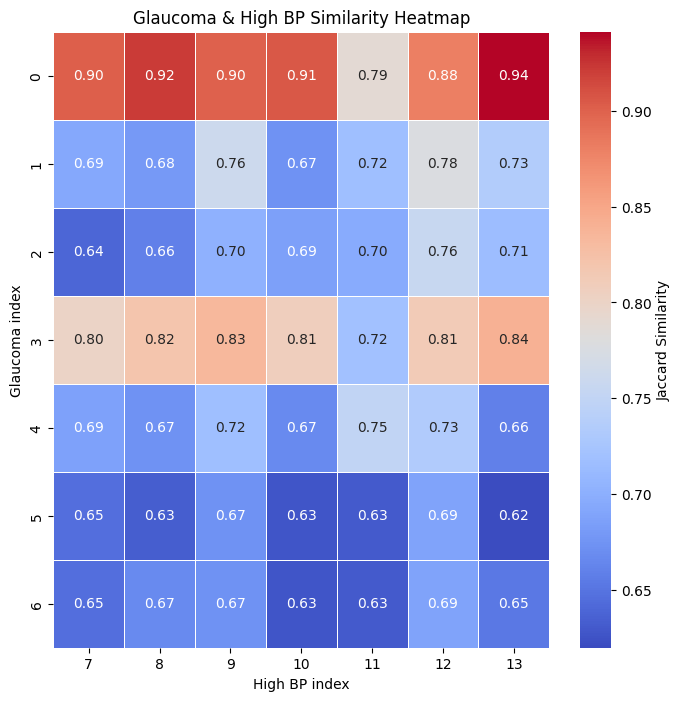

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the list of similarities
similarity_df = pd.DataFrame(similarities, columns=['Index1', 'Index2', 'Similarity'])

# Reshape the DataFrame to create a similarity matrix
similarity_matrix = similarity_df.pivot(index='Index1', columns='Index2', values='Similarity')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Glaucoma & High BP Similarity Heatmap')
plt.xlabel('High BP index')
plt.ylabel('Glaucoma index')
plt.show()


# From the above graph we can see that the highly correlated rows are:
row 0 (glaucoma) and row 13 (high bp)\
row 0 (glaucoma) and row 8 (high bp)\
row 0 (glaucoma) and row 10 (high bp)\
row 0 (glaucoma) and row 7 (high bp)\
row 0 (glaucoma) and row 9 (high bp)\
row 0 (glaucoma) and row 12 (high bp)\
row 3 (glaucoma) and row 13 (high bp)

Hence, we can say that High BP and glaucoma are highly correlated and similar to each other. A patient having high BP has a high chance of developing glaucoma.

In [ ]:
similarity_df.head()

,Index1,Index2,Similarity
0,0,7,0.901961
1,0,8,0.921569
2,0,9,0.900000
3,0,10,0.905660
4,0,11,0.788462


In [ ]:
m = similarity_df['Similarity'].mean()
m = round(m,2)
print("So, If you have one of the above disease/condition there is ",m,"% chance you might have the other condition as well.")

So, If you have one of the above disease/condition there is  0.73 % chance you might have the other condition as well.


# For glaucoma and diabetes

In [ ]:
#For diabetes
df_diabetes = new_data.loc[new_data['focus_area'] == 'Diabetes']
df_diabetes

,question,answer,source,focus_area
50,What is (are) Diabetes ?,Too Much Glucose in the Blood Diabetes means y...,NIHSeniorHealth,Diabetes
51,Who is at risk for Diabetes? ?,"Diabetes is a serious, life-long disease. It c...",NIHSeniorHealth,Diabetes
52,How to prevent Diabetes ?,The two most common forms of diabetes are type...,NIHSeniorHealth,Diabetes
53,What are the symptoms of Diabetes ?,"Diabetes is often called a ""silent"" disease be...",NIHSeniorHealth,Diabetes
54,What are the treatments for Diabetes ?,"Diabetes cannot be cured, but it can be manage...",NIHSeniorHealth,Diabetes
55,What causes Diabetes ?,Type 1 diabetes is an autoimmune disease. In a...,NIHSeniorHealth,Diabetes


In [ ]:
df_diabetes['combine'] = df_diabetes['question'] + ' ' + df_diabetes['answer']
df_diabetes

<ipython-input-43-03b0e411cf58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['combine'] = df_diabetes['question'] + ' ' + df_diabetes['answer']


,question,answer,source,focus_area,combine
50,What is (are) Diabetes ?,Too Much Glucose in the Blood Diabetes means y...,NIHSeniorHealth,Diabetes,What is (are) Diabetes ? Too Much Glucose in t...
51,Who is at risk for Diabetes? ?,"Diabetes is a serious, life-long disease. It c...",NIHSeniorHealth,Diabetes,Who is at risk for Diabetes? ? Diabetes is a s...
52,How to prevent Diabetes ?,The two most common forms of diabetes are type...,NIHSeniorHealth,Diabetes,How to prevent Diabetes ? The two most common ...
53,What are the symptoms of Diabetes ?,"Diabetes is often called a ""silent"" disease be...",NIHSeniorHealth,Diabetes,What are the symptoms of Diabetes ? Diabetes i...
54,What are the treatments for Diabetes ?,"Diabetes cannot be cured, but it can be manage...",NIHSeniorHealth,Diabetes,What are the treatments for Diabetes ? Diabete...
55,What causes Diabetes ?,Type 1 diabetes is an autoimmune disease. In a...,NIHSeniorHealth,Diabetes,What causes Diabetes ? Type 1 diabetes is an a...


In [ ]:
#tokenization
df_diabetes['diabetes_info'] = df_diabetes.apply(lambda x: tokenize(x['combine']), axis=1)
df_diabetes[['diabetes_info']]

<ipython-input-44-8a77a7682c3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['diabetes_info'] = df_diabetes.apply(lambda x: tokenize(x['combine']), axis=1)


,diabetes_info
50,"[What, is, are, Diabetes, Too, Much, Glucose, ..."
51,"[Who, is, at, risk, for, Diabetes, Diabetes, i..."
52,"[How, to, prevent, Diabetes, The, two, most, c..."
53,"[What, are, the, symptoms, of, Diabetes, Diabe..."
54,"[What, are, the, treatments, for, Diabetes, Di..."
55,"[What, causes, Diabetes, Type, diabetes, is, a..."


In [ ]:
#stopword removal
from nltk.corpus import stopwords
# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word.lower() not in stop_words]
    return filtered_text

# Apply stopwords removal to the 'Text' column
df_diabetes['diabetes_info'] = df_diabetes['diabetes_info'].apply(remove_stopwords)

# Display the modified DataFrame
df_diabetes['diabetes_info']

<ipython-input-45-9fc582a4c8d1>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diabetes['diabetes_info'] = df_diabetes['diabetes_info'].apply(remove_stopwords)


50    [Diabetes, Much, Glucose, Blood, Diabetes, mea...
51    [risk, Diabetes, Diabetes, serious, disease, l...
52    [prevent, Diabetes, two, common, forms, diabet...
53    [symptoms, Diabetes, Diabetes, often, called, ...
54    [treatments, Diabetes, Diabetes, cured, manage...
55    [causes, Diabetes, Type, diabetes, autoimmune,...
Name: diabetes_info, dtype: object

In [ ]:
# Convert "diabetes_info" to string
df_diabetes = df_diabetes.astype({'diabetes_info':'string'})

In [ ]:
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

df_diabetes['diabetes_lemmatized'] = df_diabetes.diabetes_info.apply(lemmatize_text)
print(df_diabetes)

                                  question  \
50                What is (are) Diabetes ?   
51          Who is at risk for Diabetes? ?   
52               How to prevent Diabetes ?   
53     What are the symptoms of Diabetes ?   
54  What are the treatments for Diabetes ?   
55                  What causes Diabetes ?   

                                               answer           source  \
50  Too Much Glucose in the Blood Diabetes means y...  NIHSeniorHealth   
51  Diabetes is a serious, life-long disease. It c...  NIHSeniorHealth   
52  The two most common forms of diabetes are type...  NIHSeniorHealth   
53  Diabetes is often called a "silent" disease be...  NIHSeniorHealth   
54  Diabetes cannot be cured, but it can be manage...  NIHSeniorHealth   
55  Type 1 diabetes is an autoimmune disease. In a...  NIHSeniorHealth   

   focus_area                                            combine  \
50   Diabetes  What is (are) Diabetes ? Too Much Glucose in t...   
51   Diabetes  Who is 

In [ ]:
diabetes_result_df = df_diabetes.drop_duplicates(subset=['diabetes_lemmatized'], keep='first')
print(diabetes_result_df)

                                  question  \
50                What is (are) Diabetes ?   
51          Who is at risk for Diabetes? ?   
52               How to prevent Diabetes ?   
53     What are the symptoms of Diabetes ?   
54  What are the treatments for Diabetes ?   
55                  What causes Diabetes ?   

                                               answer           source  \
50  Too Much Glucose in the Blood Diabetes means y...  NIHSeniorHealth   
51  Diabetes is a serious, life-long disease. It c...  NIHSeniorHealth   
52  The two most common forms of diabetes are type...  NIHSeniorHealth   
53  Diabetes is often called a "silent" disease be...  NIHSeniorHealth   
54  Diabetes cannot be cured, but it can be manage...  NIHSeniorHealth   
55  Type 1 diabetes is an autoimmune disease. In a...  NIHSeniorHealth   

   focus_area                                            combine  \
50   Diabetes  What is (are) Diabetes ? Too Much Glucose in t...   
51   Diabetes  Who is 

In [ ]:
# Convert the lists to strings
diabetes_result_df['diabetes_lemmatized'] = diabetes_result_df['diabetes_lemmatized'].apply(lambda x: ' '.join(x))

In [ ]:
diabetes_result_df['index'] = diabetes_result_df.index
diabetes_result_df

,question,answer,source,focus_area,combine,diabetes_info,diabetes_lemmatized,index
50,What is (are) Diabetes ?,Too Much Glucose in the Blood Diabetes means y...,NIHSeniorHealth,Diabetes,What is (are) Diabetes ? Too Much Glucose in t...,"['Diabetes', 'Much', 'Glucose', 'Blood', 'Diab...","['Diabetes', 'Much', 'Glucose', 'Blood', 'Diab...",50
51,Who is at risk for Diabetes? ?,"Diabetes is a serious, life-long disease. It c...",NIHSeniorHealth,Diabetes,Who is at risk for Diabetes? ? Diabetes is a s...,"['risk', 'Diabetes', 'Diabetes', 'serious', 'd...","['risk', 'Diabetes', 'Diabetes', 'serious', 'd...",51
52,How to prevent Diabetes ?,The two most common forms of diabetes are type...,NIHSeniorHealth,Diabetes,How to prevent Diabetes ? The two most common ...,"['prevent', 'Diabetes', 'two', 'common', 'form...","['prevent', 'Diabetes', 'two', 'common', 'form...",52
53,What are the symptoms of Diabetes ?,"Diabetes is often called a ""silent"" disease be...",NIHSeniorHealth,Diabetes,What are the symptoms of Diabetes ? Diabetes i...,"['symptoms', 'Diabetes', 'Diabetes', 'often', ...","['symptoms', 'Diabetes', 'Diabetes', 'often', ...",53
54,What are the treatments for Diabetes ?,"Diabetes cannot be cured, but it can be manage...",NIHSeniorHealth,Diabetes,What are the treatments for Diabetes ? Diabete...,"['treatments', 'Diabetes', 'Diabetes', 'cured'...","['treatments', 'Diabetes', 'Diabetes', 'cured'...",54
55,What causes Diabetes ?,Type 1 diabetes is an autoimmune disease. In a...,NIHSeniorHealth,Diabetes,What causes Diabetes ? Type 1 diabetes is an a...,"['causes', 'Diabetes', 'Type', 'diabetes', 'au...","['causes', 'Diabetes', 'Type', 'diabetes', 'au...",55


In [ ]:
# Print rows with empty documents for diabetes
print("Empty documents in diabetes:")
print(diabetes_result_df[diabetes_result_df['diabetes_lemmatized'].apply(lambda x: len(x)) == 0])

Empty documents in diabetes:
Empty DataFrame
Columns: [question, answer, source, focus_area, combine, diabetes_info, diabetes_lemmatized, index]
Index: []


In [ ]:
diabetes_final = pd.DataFrame(data = diabetes_result_df['diabetes_lemmatized'])
diabetes_final

,diabetes_lemmatized
50,"['Diabetes', 'Much', 'Glucose', 'Blood', 'Diab..."
51,"['risk', 'Diabetes', 'Diabetes', 'serious', 'd..."
52,"['prevent', 'Diabetes', 'two', 'common', 'form..."
53,"['symptoms', 'Diabetes', 'Diabetes', 'often', ..."
54,"['treatments', 'Diabetes', 'Diabetes', 'cured'..."
55,"['causes', 'Diabetes', 'Type', 'diabetes', 'au..."


In [ ]:
#find similarity between glaucoma and diabetes
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Function to calculate Jaccard similarity
def jaccard_similar(list1, list2):
    intersection = len(set(list1).intersection(list2))
    union = len(set(list1).union(list2))
    return intersection / union if union != 0 else 0

# Function to calculate Jaccard similarity between rows of two DataFrames
def calculate_similar(df1, df2):
    similarities = []

    for index1, row1 in df1.iterrows():
        for index2, row2 in df2.iterrows():
            sim = jaccard_similar(row1['glaucoma_lemmatized'], row2['diabetes_lemmatized'])
            similarities.append((index1, index2, sim))

    return similarities


similarities = calculate_similar(glaucoma_final, diabetes_final)

# Displaying the results
for idx1, idx2, sim in similarities:
    print(f"Similarity between row {idx1} in glaucoma and row {idx2} in diabetes: {sim}")

Similarity between row 0 in glaucoma and row 50 in diabetes: 0.8846153846153846
Similarity between row 0 in glaucoma and row 51 in diabetes: 0.9
Similarity between row 0 in glaucoma and row 52 in diabetes: 0.8867924528301887
Similarity between row 0 in glaucoma and row 53 in diabetes: 0.84
Similarity between row 0 in glaucoma and row 54 in diabetes: 0.9056603773584906
Similarity between row 0 in glaucoma and row 55 in diabetes: 0.66
Similarity between row 1 in glaucoma and row 50 in diabetes: 0.7142857142857143
Similarity between row 1 in glaucoma and row 51 in diabetes: 0.8
Similarity between row 1 in glaucoma and row 52 in diabetes: 0.6862745098039216
Similarity between row 1 in glaucoma and row 53 in diabetes: 0.7727272727272727
Similarity between row 1 in glaucoma and row 54 in diabetes: 0.7058823529411765
Similarity between row 1 in glaucoma and row 55 in diabetes: 0.8157894736842105
Similarity between row 2 in glaucoma and row 50 in diabetes: 0.6938775510204082
Similarity between

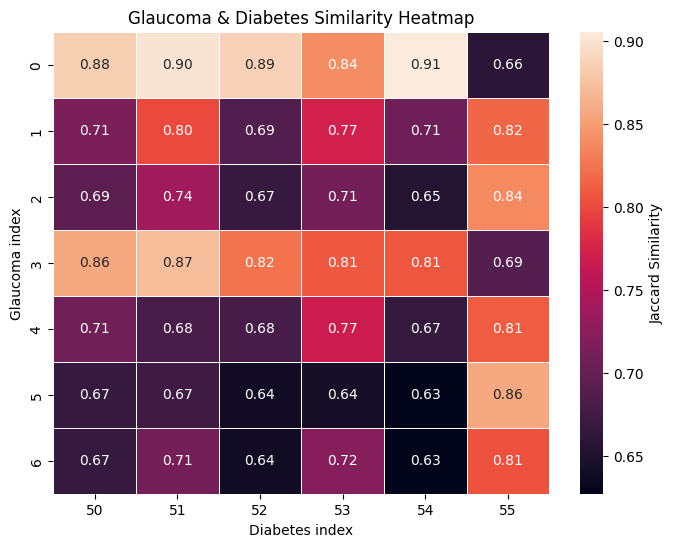

In [ ]:
#plotting the similarities between glaucoma and diabetes
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the list of similarities
similarity_df = pd.DataFrame(similarities, columns=['Index1', 'Index2', 'Similarity'])

# Reshape the DataFrame to create a similarity matrix
similarity_matrix = similarity_df.pivot(index='Index1', columns='Index2', values='Similarity')

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(similarity_matrix, annot=True, fmt=".2f", linewidths=.5, cbar_kws={'label': 'Jaccard Similarity'})
plt.title('Glaucoma & Diabetes Similarity Heatmap')
plt.xlabel('Diabetes index')
plt.ylabel('Glaucoma index')
plt.show()

# From the above graph we can see that the highly correlated rows are:
row 0 (glaucoma) and row 54 (diabetes)\
row 0 (glaucoma) and row 51 (diabetes)\
row 0 (glaucoma) and row 52 (diabetes)\
row 0 (glaucoma) and row 50 (diabetes)\
row 1 (glaucoma) and row 55 (diabetes)\
row 2 (glaucoma) and row 55 (diabetes)\
row 3 (glaucoma) and row 51 (diabetes)\
row 5 (glaucoma) and row 55 (diabetes)

# Hence, we can say that diabetes and glaucoma are highly correlated and similar to each other. A patient having diabetes can increase his/ her chance of developing glaucoma.

In [ ]:
m = similarity_df['Similarity'].mean()
m = round(m*100)
print("So, If you have one of the above disease/condition there is ",m,"% chance you might have/get the other condition as well.")

So, If you have one of the above disease/condition there is  75 % chance you might have/get the other condition as well.


BERT

In [ ]:
import transformers
import pandas as pd
import torch

# Load the BERT tokenizer and model
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')


# Tokenize and encode the texts
tokenized1 = glaucoma_final['glaucoma_lemmatized'].apply(lambda text: tokenizer.encode(text, max_length=512, truncation=True))
tokenized2 = diabetes_final['diabetes_lemmatized'].apply(lambda text: tokenizer.encode(text, max_length=512, truncation=True))

# Convert tokenized lists to PyTorch tensors
encoded1 = [torch.tensor(i) for i in tokenized1]
encoded2 = [torch.tensor(i) for i in tokenized2]

# Obtain BERT embeddings with pooling
with torch.no_grad():
    embeddings1 = model(torch.nn.utils.rnn.pad_sequence(encoded1, batch_first=True))[0][:, 0, :]
    embeddings2 = model(torch.nn.utils.rnn.pad_sequence(encoded2, batch_first=True))[0][:, 0, :]

# Apply global average pooling to get fixed-size embeddings
pooled_embeddings1 = torch.nn.functional.adaptive_avg_pool1d(embeddings1.unsqueeze(0).transpose(1, 2), 1).squeeze()
pooled_embeddings2 = torch.nn.functional.adaptive_avg_pool1d(embeddings2.unsqueeze(0).transpose(1, 2), 1).squeeze()

# Calculate the cosine similarity between the pooled embeddings
similarities = torch.nn.functional.cosine_similarity(pooled_embeddings1, pooled_embeddings2, dim=-1)

# Print the similarities
print(similarities.item())


We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.


0.9434417486190796


In [ ]:
import transformers
import pandas as pd
import torch

# Load the BERT tokenizer and model
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')


# Tokenize and encode the texts
tokenized1 = glaucoma_final['glaucoma_lemmatized'].apply(lambda text: tokenizer.encode(text, max_length=512, truncation=True))
tokenized2 = bp_final['bp_lemmatized'].apply(lambda text: tokenizer.encode(text, max_length=512, truncation=True))

# Convert tokenized lists to PyTorch tensors
encoded1 = [torch.tensor(i) for i in tokenized1]
encoded2 = [torch.tensor(i) for i in tokenized2]

# Obtain BERT embeddings with pooling
with torch.no_grad():
    embeddings1 = model(torch.nn.utils.rnn.pad_sequence(encoded1, batch_first=True))[0][:, 0, :]
    embeddings2 = model(torch.nn.utils.rnn.pad_sequence(encoded2, batch_first=True))[0][:, 0, :]

# Apply global average pooling to get fixed-size embeddings
pooled_embeddings1 = torch.nn.functional.adaptive_avg_pool1d(embeddings1.unsqueeze(0).transpose(1, 2), 1).squeeze()
pooled_embeddings2 = torch.nn.functional.adaptive_avg_pool1d(embeddings2.unsqueeze(0).transpose(1, 2), 1).squeeze()

# Calculate the cosine similarity between the pooled embeddings
similarities = torch.nn.functional.cosine_similarity(pooled_embeddings1, pooled_embeddings2, dim=-1)

# Print the similarities
print(similarities.item())

0.8943971395492554


ROBERTA

In [ ]:
import pandas as pd
import numpy as np
from transformers import RobertaModel, RobertaTokenizer

# Load the RoBERTa model and tokenizer
model = RobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize and encode the texts
def encode_text(text):
    encoding = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    return model(**encoding).last_hidden_state.mean(dim=1).squeeze().detach().numpy()

glaucoma_final['encoding'] = glaucoma_final['glaucoma_lemmatized'].apply(encode_text)
diabetes_final['encoding'] = diabetes_final['diabetes_lemmatized'].apply(encode_text)

# Calculate the cosine similarity between the embeddings
def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Assuming you have one text in each data frame, you can access the encoding like this:
encoding1 = glaucoma_final['encoding'].iloc[0]
encoding2 = diabetes_final['encoding'].iloc[0]

similarity = cosine_similarity(encoding1, encoding2)
print(similarity)


Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.9931537


In [ ]:
import pandas as pd
import numpy as np
from transformers import RobertaModel, RobertaTokenizer

# Load the RoBERTa model and tokenizer
model = RobertaModel.from_pretrained('roberta-base')
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

# Tokenize and encode the texts
def encode_text(text):
    encoding = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    return model(**encoding).last_hidden_state.mean(dim=1).squeeze().detach().numpy()

glaucoma_final['encoding'] = glaucoma_final['glaucoma_lemmatized'].apply(encode_text)
bp_final['encoding'] = bp_final['bp_lemmatized'].apply(encode_text)

# Calculate the cosine similarity between the embeddings
def cosine_similarity(embedding1, embedding2):
    return np.dot(embedding1, embedding2) / (np.linalg.norm(embedding1) * np.linalg.norm(embedding2))

# Assuming you have one text in each data frame, you can access the encoding like this:
encoding1 = glaucoma_final['encoding'].iloc[0]
encoding2 = bp_final['encoding'].iloc[0]

similarity = cosine_similarity(encoding1, encoding2)
print(similarity)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


0.9843661
